# **Object Detection System**

In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [4]:
frozen_model = 'frozen_inference_graph.pb'



In [ ]:
model = cv2.dnn_DetectionModel (frozen_model,config_file)

In [ ]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')

In [ ]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
 print(len(classLabels))

80


In [ ]:
model.setInputSize(320,320)

model.setInputScale (1.0/127.5)

model.setInputMean ((127.5,127.5, 127.5))

model.setInputSwapRB (True)

< cv2.dnn.Model 0x7d29661e9db0>

# **Read an Image**

In [ ]:
img=cv2.imread('img1.jpeg')

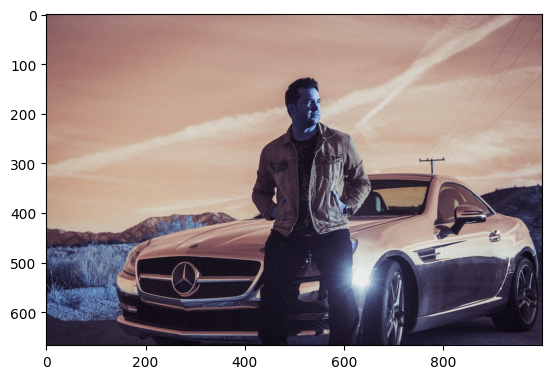

In [ ]:
plt.imshow(img)

In [ ]:
ClassIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [ ]:
print(ClassIndex)

[1 3]


In [ ]:
font_scale = 3

font = cv2.FONT_HERSHEY_PLAIN

for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidece.flatten(), bbox):
  cv2.rectangle(img,boxes,(255, 0, 0),2)
  cv2.putText(img,classLabels [ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

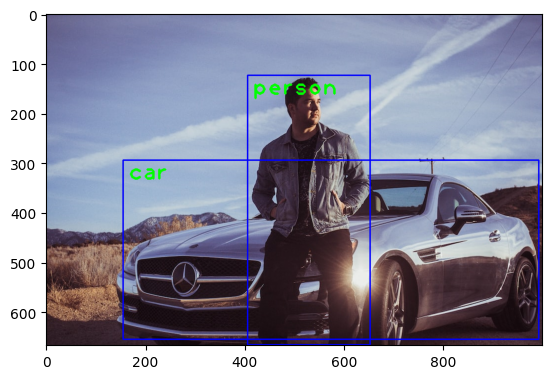

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))